# Promolecule properties

AtomDB provides basic functionality to compute promolecular properties from the atomic data. The tool is called `promolecule`.
The module offers evaluation of intensive and extensive properties with the tool function `make_promolecule`.

<!-- Promolecular properties are linear combinations of the properties of isolated atomic species which are placed at the positions of the elements forming the molecule. -->

## Building a promolecule

Creating a promolecule is as simple as providing the list of elements and coordinates defining the molecule as is shown here for the Berillium dimer. Additionally, the source of atomic properties is required, which in this case is the `slater` database.

In [1]:
import numpy as np
from atomdb import make_promolecule


# Atomic numbers of each center
atnums = [4, 4]

# Spatial coordinates of each center
atcoords = np.asarray([
    [0., 0., 0.],
    [0., 0., 2.],
], dtype=float)


# Make promolecule instance
promol = make_promolecule(atnums, atcoords, dataset='slater')

## Extensive (global) properties

$$
P^{mol}_{pro} = \sum^{N_{atoms}}_{i=1} c_i P^{atom}_i
$$
where $P^{atom}_i$ are the atomic properties and $c_i$ are the coefficients.


In [2]:
print("\nProperties:")
# print(f"Nelec  \t{promol.nelec():+.6f}")
# print(f"Nspin  \t{promol.nspin():+.6f}")
print(f"Mass   \t{promol.mass():.6f}")
print(f"Energy \t{promol.energy():.6f}")


Properties:
Mass   	32856.409629
Energy 	-29.146046


## Extensive (local) properties: density properties

In [3]:
# Construct a 3D grid along the z-axis of the linear molecule
N = 2000
rad_grid = np.linspace(-3., 5., num=N)
grid = np.zeros((N, 3))
grid[:,2] = rad_grid

# Compute the density and kinetic energy density at the points
promol_dens = promol.density(grid, spin='t', log=True)
promol_ked = promol.ked(grid, spin='t', log=False)
promol_grad = promol.gradient(grid, spin='t', log=False)
promol_lapl = promol.laplacian(grid, spin='t', log=False)
promol_hess = promol.hessian(grid, spin='t', log=False)

### Visualizing density properties

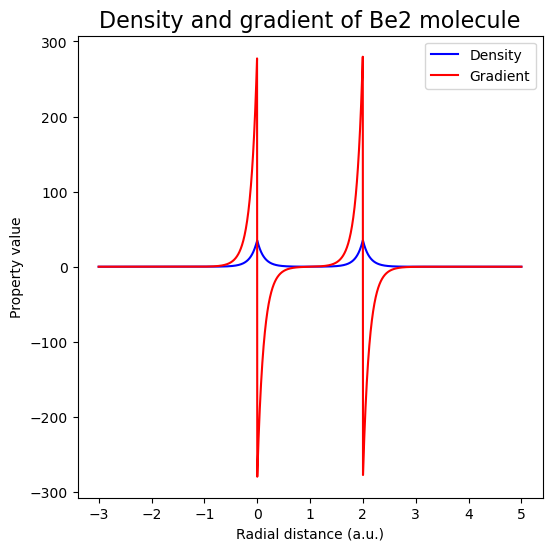

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()

ax.plot(rad_grid, promol_dens, color="blue", label="Density")
ax.plot(rad_grid, promol_grad[:,2], color="red", label="Gradient")
ax.set_xlabel("Radial distance (a.u.)")
ax.set_ylabel("Property value")
ax.legend()
ax.set_title("Density and gradient of Be2 molecule", fontsize=16)
plt.show()

## Intensive properties

$$
\langle P \rangle_p =  \left(\frac{1}{n}\sum_{k=1}^n P_k^p \right)^{\tfrac{1}{p}}
$$
where $P_k^p$ are the atomic properties and $p$ is the power of the average.

In [5]:
# print("\nProperties:")
# print(f"Promolecule IP (eV) \t{promol.ip(p=1):.6f}", ) # not supported by Slater dataset

## Promolecule with floating point charges and/or multiplicities

When defining a promolecule, the charges and multiplicities of the atomic species can be specified as through the `charges` and `mults` arguments. These can be either integers or floats. When the values of these variables are floats, ...

Note that if one of (charges|mults) is a float and the other is an integer, we also interpolate.

In [6]:
# Charges of each center
# (integer to directly use a species, float to interpolate)
charges = [1.2, 0]

# Multiplicities of each center
# (integer to directly use a species, float to interpolate)
# (positive for spin-up, negative for spin-down)
mults = [-1.2, 1]

# Build a promolecule
promol = make_promolecule(
    atnums,
    atcoords,
    charges=charges,
    mults=mults,
    units="bohr",
    dataset="uhf_augccpvdz",
)

print("\nProperties:")
# print(f"Nelec  \t{promol.nelec():+.6f}")
# print(f"Nspin  \t{promol.nspin():+.6f}")
print(f"Mass   \t{promol.mass():.6f}")
print(f"Energy \t{promol.energy():.6f}")

/Users/maximilianvanzyl/modules/AtomDB/atomdb/promolecule.py:540: UserWarning: Unable to load species corresponding to `charge, mult`; generating species via linear combination of other species
  warn(



Properties:
Mass   	32856.409629
Energy 	-28.715053
